In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [2]:
act.discovery.download_arm_data?

Signature:
act.discovery.download_arm_data(
    username,
    token,
    datastream,
    startdate,
    enddate,
    time=None,
    output=None,
)
Docstring:
This tool will help users utilize the ARM Live Data Webservice to download
ARM data.

Parameters
----------
username : str
    The username to use for logging into the ADC archive.
token : str
    The access token for accessing the ADC archive.
datastream : str
    The name of the datastream to acquire.
startdate : str
    The start date of the data to acquire. Formats accepted are
    YYYY-MM-DD, DD.MM.YYYY, DD/MM/YYYY, YYYYMMDD, YYYY/MM/DD or
    any of the previous formats with THH:MM:SS added onto the end
    (ex. 2020-09-15T12:00:00).
enddate : str
    The end date of the data to acquire. Formats accepted are
    YYYY-MM-DD, DD.MM.YYYY, DD/MM/YYYY, YYYYMMDD or YYYY/MM/DD, or
    any of the previous formats with THH:MM:SS added onto the end
    (ex. 2020-09-15T13:00:00).
time: str or None
    The specific time. Format is HHMMS

In [3]:
# Set your username and token here!
username = 'hwagner'
token = '25cd874b270fac28'

# Set the datastream and start/enddates
datastream = 'kcgarsclkazrbnd1kolliasM1.c0'
startdate = '2024-09-15'
enddate = '2024-09-20'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240916.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240920.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240917.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240915.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240918.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240919.000000.nc

If you use these data to prepare a publication, please cite:

Johnson, K., Giangrande, S., & Toto, T. Active Remote Sensing of CLouds (ARSCL)
product using Ka-band ARM Zenith Radars (ARSCLKAZRBND1KOLLIAS), 2024-09-15 to
2024-09-20, ARM Mobile Facility (KCG), kennaook ⁄ Cape Grim, Tasmania,
Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1393438



In [24]:
# Let's read in the data using ACT and check out the data
ds_kazr = act.io.read_arm_netcdf(result)

ds_kazr

<xarray.Dataset> Size: 16MB
Dimensions:                       (time: 129600, layer: 10)
Coordinates:
  * time                          (time) datetime64[ns] 1MB 2024-09-15 ... 20...
  * layer                         (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
Data variables:
    base_time                     (time) datetime64[ns] 1MB 2024-09-15 ... 20...
    time_offset                   (time) datetime64[ns] 1MB 2024-09-15 ... 20...
    radar_first_top               (time) float32 518kB dask.array<chunksize=(21600,), meta=np.ndarray>
    cloud_base_best_estimate      (time) float32 518kB dask.array<chunksize=(21600,), meta=np.ndarray>
    cloud_layer_base_height       (time, layer) float32 5MB dask.array<chunksize=(21600, 10), meta=np.ndarray>
    cloud_layer_top_height        (time, layer) float32 5MB dask.array<chunksize=(21600, 10), meta=np.ndarray>
    instrument_availability_flag  (time) int16 259kB dask.array<chunksize=(21600,), meta=np.ndarray>
    lat                           (time) float32 518kB -40.68 -40.68 ... -40.68
    lon                           (time) float32 518kB 144.7 144.7 ... 144.7
    alt                           (time) float32 518kB 80.0 80.0 ... 80.0 80.0
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240915', '20240916', '20240917', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

<Axes: title={'center': 'kazr cloud_layer_top_height on 20240915'}, xlabel='Time [UTC]', ylabel='(unitless)'>

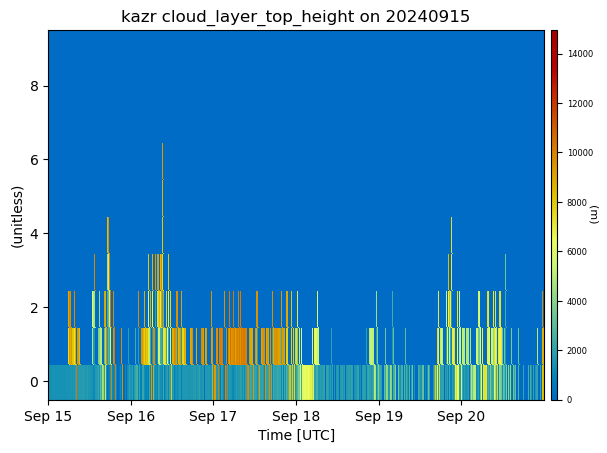

In [25]:
display = act.plotting.TimeSeriesDisplay({'kazr': ds_kazr})

display.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

In [60]:
day = 0
for day in range(6):
    print(day)
    single_day = ds_kazr.sel(time='2024-09-15', '2024-09-20')
    TimeSeriesDisplay = act.plotting.TimeSeriesDisplay(single_day)
    TimeSeriesDisplay.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

0


NameError: name 'f' is not defined

In [42]:
ds_kazr = ds_kazr.where(ds_kazr.where(ds_kazr.cloud_layer_top_height < 4000, drop=True))

KeyError: 'Indexing with a boolean dask array is not allowed. This will result in a dask array of unknown shape. Such arrays are unsupported by Xarray.Please compute the indexer first using .compute()'